In [1]:
import os

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
# Expect stable approximation

# Specify the directory to search
activation_list = ["linear", "hardtanh", "tanh"]
model_list = ["diagonalrnn", "rnn", "softplusrnn"]
target_name_list = ["rnn", "transformer"]

index_0, index_1, index_2 = 1, 0, 0
index_0, index_1, index_2 = 1, 0, 1

activation = activation_list[index_0]
model = model_list[index_1]
target_name = target_name_list[index_2]

# path = f"../logs/Filter_{activation}_{model}_{target_name}_PERTURB/runs/20231109"

import os
from datetime import datetime

# Get the list of directories in the "runs" directory
dirs = os.listdir(f"../logs/Filter_{activation}_{model}_{target_name}_PERTURB/runs")

# Filter out non-date directories
dirs = [d for d in dirs if d.isdigit() and len(d) == 8]

# Convert the directories to datetime objects and find the latest one
latest_date = max(datetime.strptime(d, "%Y%m%d") for d in dirs)

# Format the date as a string
date_str = latest_date.strftime("%Y%m%d")

path = f"../logs/Filter_{activation}_{model}_{target_name}_PERTURB/runs/{date_str}"

['123212', '123236', '123255', '123317', '125937', '130043', '130145', '130247', '130348', '130451']


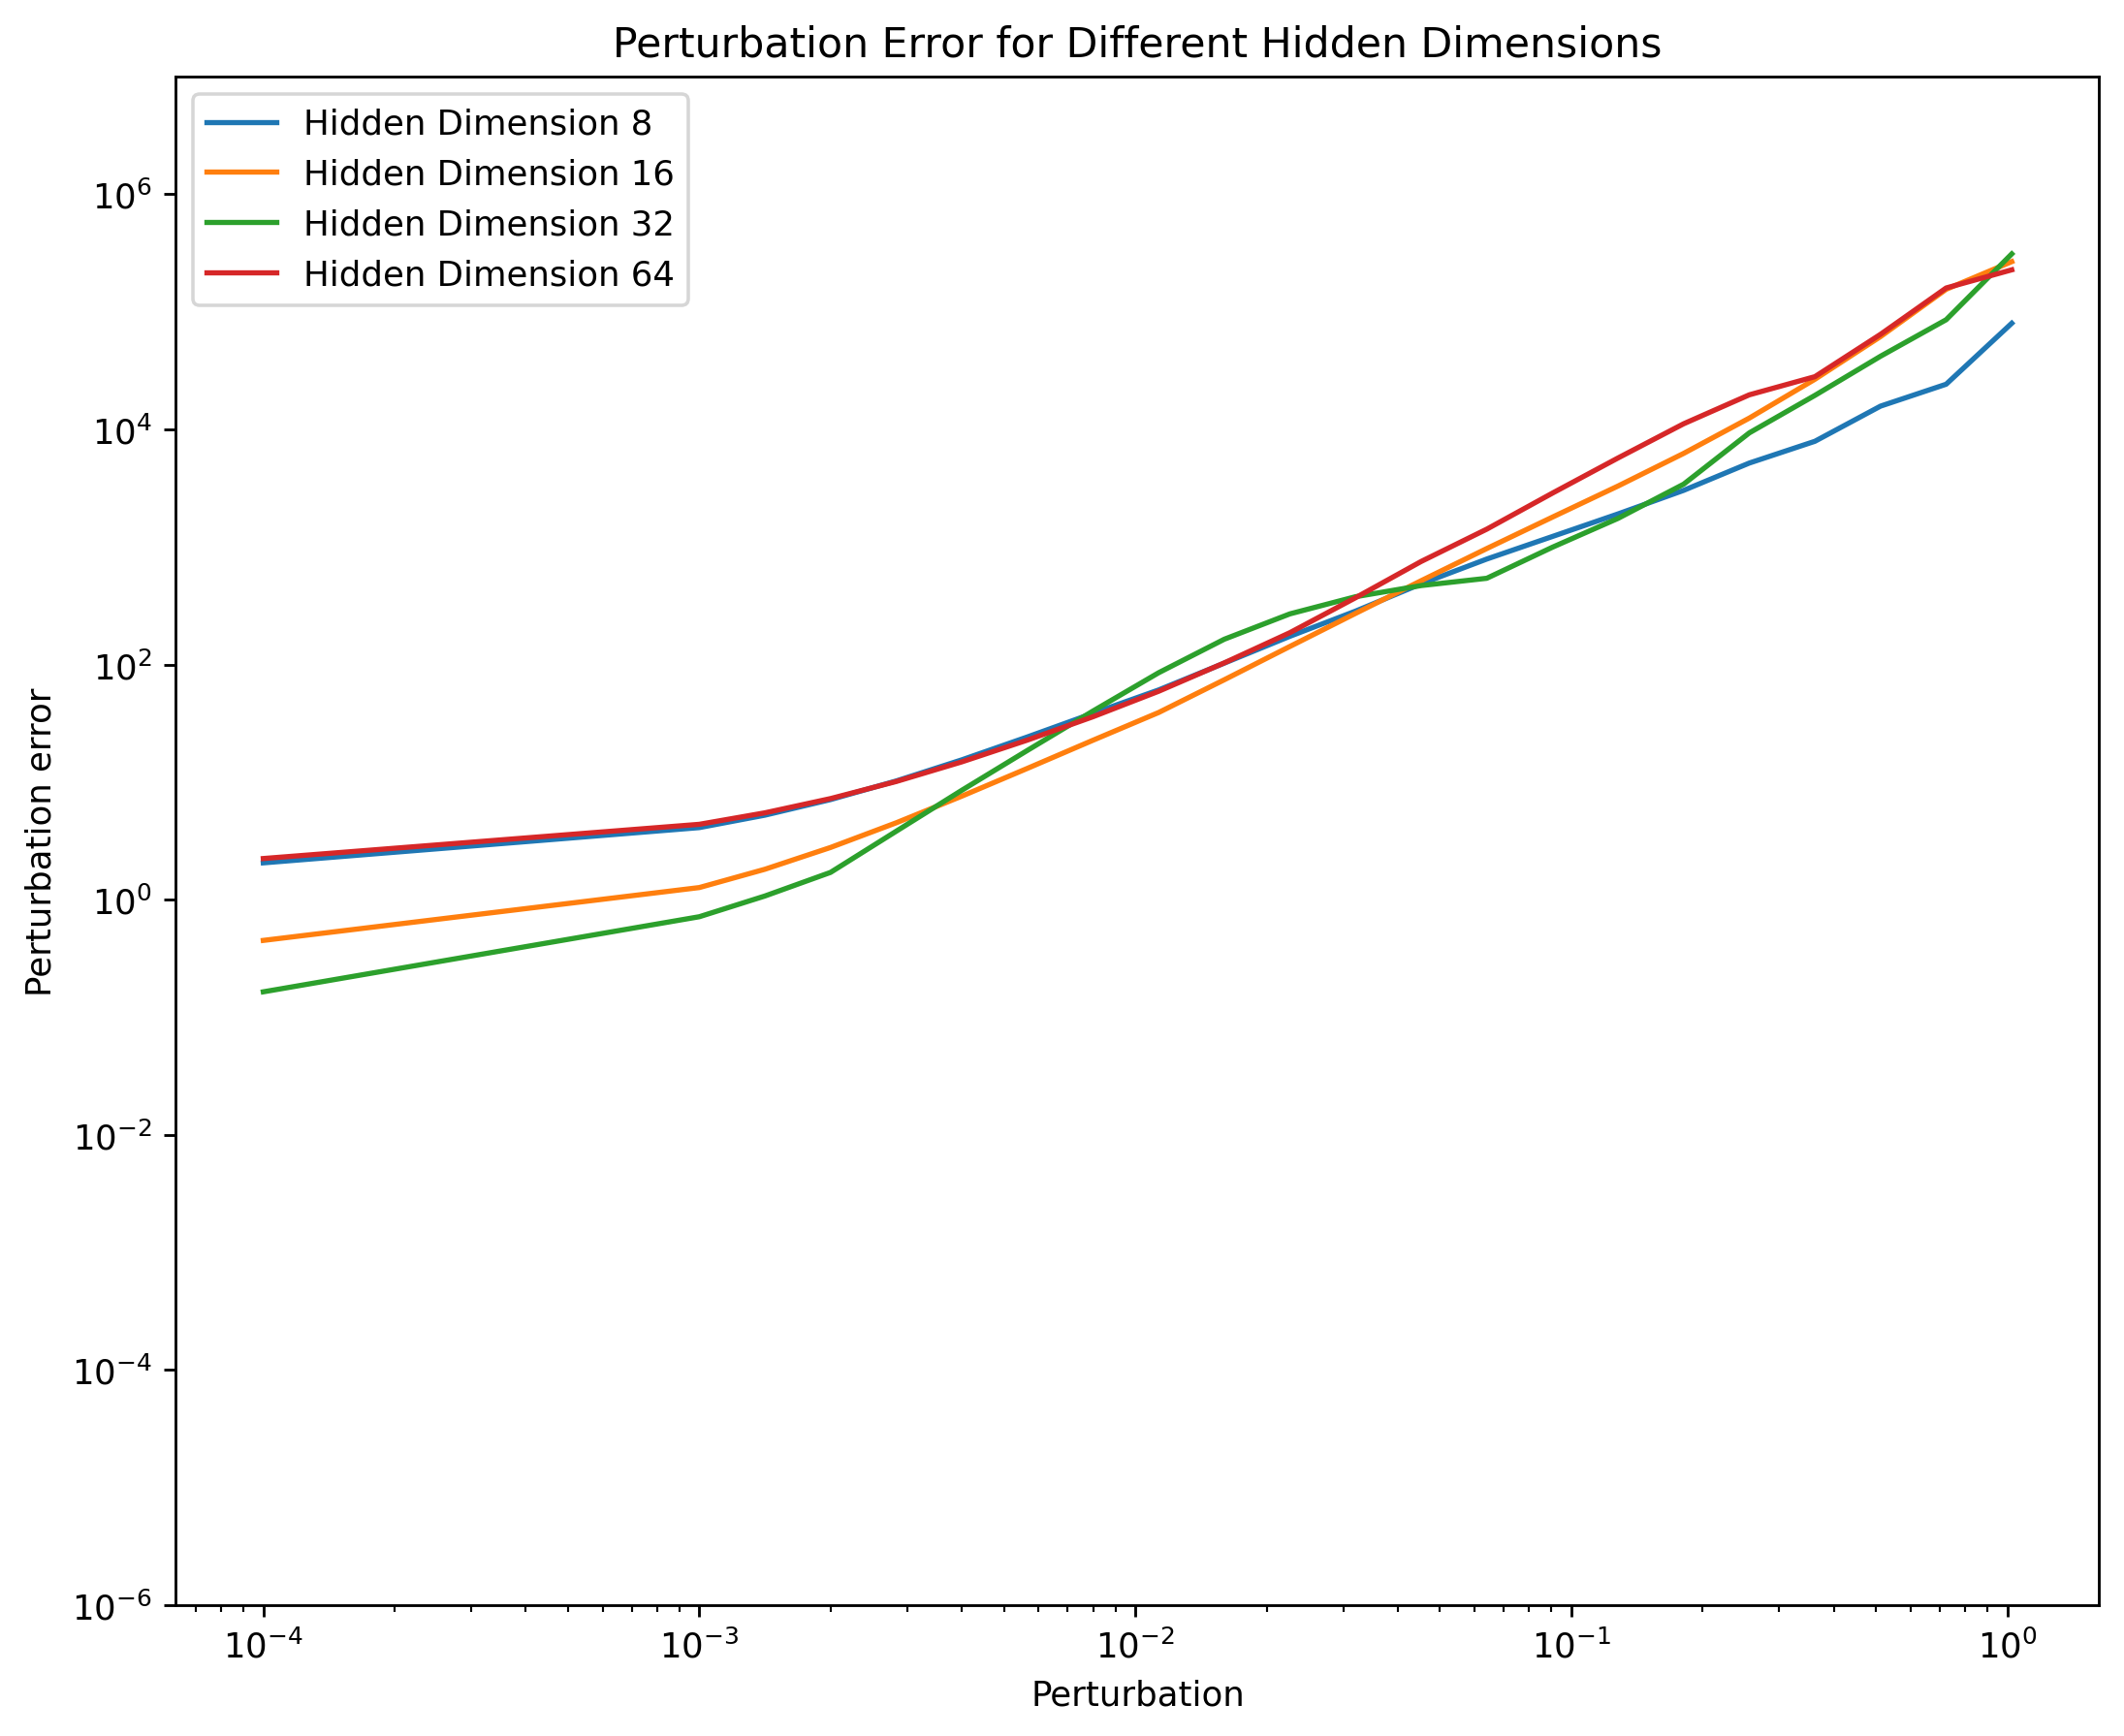

In [3]:
# Set the directory names, which in this case are also the hidden dimensions
hidden_dims = ["8", "16", "32", "64"]
# hidden_dims = ["8", "16", "32"]

# read the directory list in current directory
timestamps = [name for name in os.listdir(path) if os.path.isdir(os.path.join(path, name))]
# sort the timestamps
timestamps.sort()
print(timestamps)
# timestamps = timestamps[:4]
# timestamps = timestamps[4:8]
timestamps = timestamps[-4:]

plt.figure(figsize=(10, 8), dpi=256)

for index, (dim, timestamp) in enumerate(zip(hidden_dims, timestamps)):
    # Read the data from the CSV file
    data = pd.read_csv(os.path.join(path, timestamp, "perturbation_error.csv"))
    # print(data)

    # Plot the data
    # print(data["perturbation_error"])
    data["perturbation"][0] = 1e-4
    plt.plot(data["perturbation"], data["perturbation_error"], label=f"Hidden Dimension {dim}")


# Add title and labels
plt.title("Perturbation Error for Different Hidden Dimensions")
plt.xlabel("Perturbation")
plt.ylabel("Perturbation error")

plt.xscale("log")
plt.yscale("log")
# plt.ylim([1e-4, 1e7])
plt.ylim([1e-6, 1e7])

# Add legend
plt.legend()

# Show the plot
plt.savefig(os.path.join(path, "perturbation_error.pdf"))
plt.savefig(os.path.join(path, "perturbation_error.png"))
plt.show()